# Simple Linear Regression

This notebook demonstrates how to implement simple linear regression using Scikit-Learn.

# Here we first load the required libraries in python.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

# Dataset Description

We start by downloading a dataset that relates to the fuel consumption and CO2 emissions of cars.

The dataset includes various attributes such as model year, make, model, vehicle class, engine size, number of cylinders, transmission type, and fuel consumption metrics (city, highway, and combined).

The target variable is CO2 emissions in grams per kilometer (g/km).

# Download the dataset

In [2]:
fuelfile = os.path.join(
    'Storage', 
    'FuelConsumption.csv'
)

df = pd.read_csv(fuelfile)

display(df)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# Data Visualization and Anylisis
Lets first have a descriptive exploration on our data.

In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


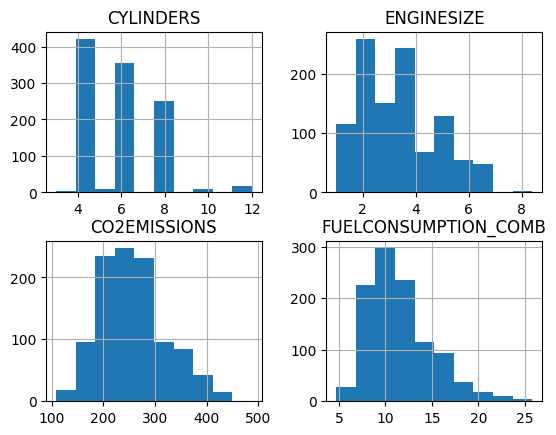

In [4]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

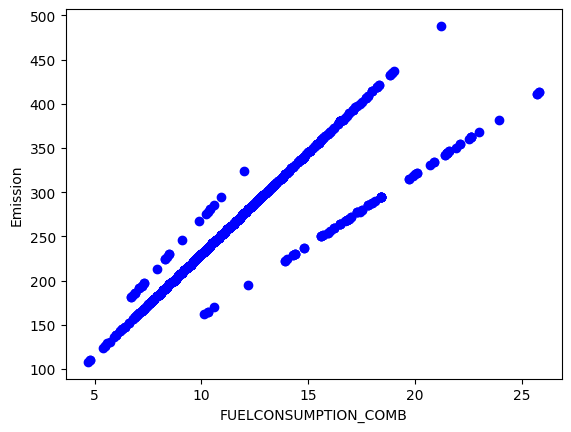

In [5]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

# Feature set
Lets defind feature sets, X:

In [6]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [7]:
X = df.values
X

array([[2014, 'ACURA', 'ILX', ..., 8.5, 33, 196],
       [2014, 'ACURA', 'ILX', ..., 9.6, 29, 221],
       [2014, 'ACURA', 'ILX HYBRID', ..., 5.9, 48, 136],
       ...,
       [2014, 'VOLVO', 'XC70 AWD', ..., 11.8, 24, 271],
       [2014, 'VOLVO', 'XC70 AWD', ..., 11.3, 25, 260],
       [2014, 'VOLVO', 'XC90 AWD', ..., 12.8, 22, 294]], dtype=object)

Target Labels

In [8]:
y = df['CO2EMISSIONS'].values
y

array([196, 221, 136, ..., 271, 260, 294])

# Train Test Split


In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [10]:
train.shape

(864, 13)

In [11]:
test.shape

(203, 13)

# Regression
## Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.


In [12]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[39.32832344]]
Intercept:  [125.27400016]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

# Plot outputs

Text(0, 0.5, 'CO2 Emission')

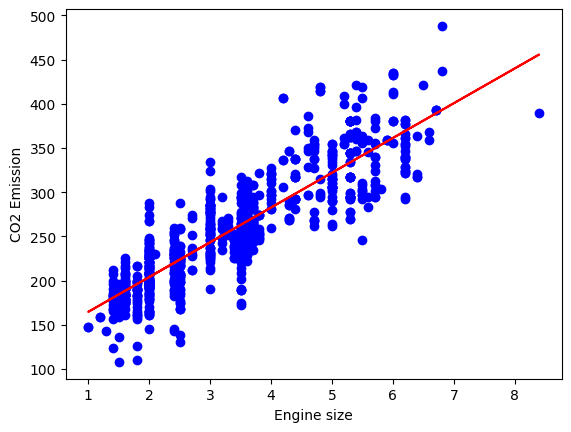

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

# Model Evaluation

Evaluating a regression model is crucial to understand its performance and identify areas for improvement. There are several key metrics commonly used for this purpose:

**Mean Absolute Error (MAE):**
* *Definition*: Mean of the absolute differences between predicted and actual values.

* *Advantage*: Provides a straightforward interpretation of the average magnitude of errors.

* *Disadvantage*: Ignores the direction of errors, which can be important in some applications.

**Mean Squared Error (MSE):**

* *Definition*: Mean of the squared differences between predicted and actual values.

* *Advantage*: Penalizes larger errors more heavily than MAE, making it more sensitive to outliers.

* *Disadvantage*: The squared term makes MSE sensitive to very large errors, potentially skewing the metric.


**Root Mean Squared Error (RMSE):**

* *Definition*: Square root of the MSE.

* *Advantage*: RMSE is interpretable in the same units as the target variable, which can be easier to relate to in practical terms.

* *Disadvantage*: Similar to MSE, RMSE is sensitive to outliers and large errors.

**R-squared (Coefficient of Determination):**
* *Definition*: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

* *Interpretation*: Higher values indicate that the model explains a larger proportion of the variance in the dependent variable.

* *Best Possible Score:* 1.0 indicates a perfect fit, while negative values can occur if the model performs worse than a horizontal line.

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
y_pred = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , test_y) )

Mean absolute error: 22.68
Residual sum of squares (MSE): 932.80
R2-score: 0.72
